# Linear Regression

In [94]:
# importing the libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')


from sklearn.datasets import load_boston
boston = load_boston()

"The Boston Housing Dataset" składa się z cen nieruchomości w różnych miejscach w Bostonie. Wraz z ceną, zestaw danych zawiera również informacje takie jak przestępczość (CRIM), obszary działalności niedetalicznej w mieście (INDUS), wiek osób, które są właścicielami domu (AGE), oraz wiele innych atrybutów, które są dostępne.

W pierwszym kroku zobaczmy jak nasze dane się prezentują, w jakiej strukturze są przedstawione itd.

In [95]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

## Poznawanie Danych

Jak widzimy dane są słownikiem, sprawdźmy jakie ma on "klucze"

In [96]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


data: zawiera informacje dla różnych domów
target: ceny domu
feature_names: atrybuty
DESCR: opisuje zbiór danych


Przyjrzyjmy się danym: jaki mają opis, wymiar

In [97]:
print(boston.data.shape)

(506, 13)


Jak widzimy, zwraca (506, 13), co oznacza, że istnieje 506 wierszy danych z 13 kolumnami. Teraz chcemy wiedzieć, co to jest te 13 kolumn. 

In [98]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Teraz zamieńmy nasz zbiór na typ "pandas"! Wystarczy wywołać metodę pd.DataFrame() i przekazać plik boston.data. Jednocześnie nadajmy naszej "frame" nazwe kolumn.

In [99]:
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Widzimy, że w danych brakuje wartości docelowej MEDV. Tworzymy nową kolumnę wartości docelowych i dodajemy ją do ramki danych.

In [100]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Data preprocessing

Ponieważ zajmie mi to bardzo dużo czasu, jeśli wykonam całą analizę. Więc idziemy do podstawowego. Chcemy zobaczyć statystyki podsumowania zbioru danych, uruchamiając poniższy fragment.

In [101]:
print(bos.describe())
bos.isnull().sum()

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Jednak w tym zbiorze danych nie ma brakujących wartości, jak pokazano poniżej.

## Exploratory Data Analysis

Analiza danych jest bardzo ważnym krokiem przed szkoleniem modelu. W tej sekcji użyjemy niektórych wizualizacji, aby zrozumieć zależności w danych.

W tym celu tworzymy macierz korelacji, która mierzy liniowe zależności pomiędzy zmiennymi. Macierz korelacji może być utworzona za pomocą funkcji corr z biblioteki pandas. Użyjemy funkcji heatmap z biblioteki seaborn do wykreślenia macierzy korelacji.

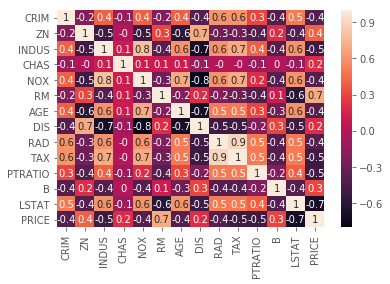

In [102]:
correlation_matrix = bos.corr().round(1)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Współczynnik korelacji jest z przedzialu od -1 do 1. Jeśli wartość jest bliska 1, oznacza to, że istnieje silna dodatnia korelacja między dwiema zmiennymi. Gdy jest zbliżony do -1, zmienne mają silną korelację ujemną.

#### Obserwacje:
- Aby dopasować model regresji liniowej, wybieramy te cechy, które mają wysoką korelację z naszą docelową zmienną MEDV. Patrząc na macierz korelacji, widzimy, że RM ma silną dodatnią korelację z Price (0,7), gdzie LSTAT ma wysoką ujemną korelację z MEDV (-0,74).
- Ważnym punktem w wyborze cech modelu regresji liniowej jest sprawdzenie wieloklinowości. Funkcje RAD, TAX mają korelację wynoszącą 0,91. Te pary funkcji są ze sobą silnie skorelowane. Nie powinniśmy wybierać obu tych funkcji razem w celu szkolenia modelu. To samo dotyczy funkcji DIS i AGE, które mają korelację -0,75.


W oparciu o powyższe obserwacje wybieramy RM i LSTAT jako nasze cechy. Korzystając z wykresu punktowego, zobaczmy, jak te funkcje różnią się w przypadku Price.

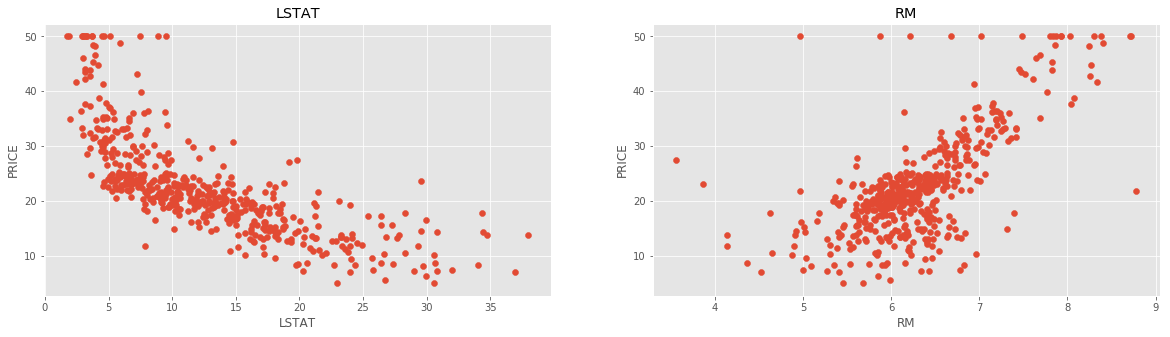

In [103]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bos['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bos[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

#### Obserwacje:
- Ceny rosną, gdy wartość RM rośnie liniowo. Istnieje kilka wartości odstających, a dane wydają się być ograniczone do 50.
- Ceny mają tendencję do spadku wraz ze wzrostem LSTAT. Choć nie wygląda na to, na dokładną liniowość.

## Przygotowanie danych do modelu


In [104]:
X = bos[['LSTAT','RM']]
Y = bos['PRICE']

## Podział danych na zestawy treningowe i testowe

Następnie dzielimy dane na zestawy treningowe i testowe. Szkolimy model z 2/3 zestawu i testujemy z pozostałej 1/3. Robimy to, aby ocenić wydajność modelu na niewidocznych danych. Do dzielenia danych używamy funkcji train_test_split udostępnianej przez bibliotekę naukową scikit. W końcu drukujemy rozmiary naszego treningu i zestawu testów, aby sprawdzić, czy podział został wykonany prawidłowo.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 2)
(167, 2)
(339,)
(167,)


## Linear Regression - Regresja Liniowa

Regresja liniowa jest jedną z najpopularniejszych metod tworzenia modelu i jest jedną z technik regresji, z której ludzie zaczynają się uczyć modelowania predykcyjnego. Ograniczenie regresji liniowej polega na tym, że wartość docelowa musi być ciągła, podczas gdy wartości predykcyjne mogą być zmienną ciągłą lub dyskretną.

Przy ustalaniu regresji liniowej, linia prosta będzie używana do wskazania linii najlepszego dopasowania do modelowania trendu (znanego również jako linia regresji). Aby uzyskać samą linię regresji, używamy techniki zwanej metodą Least Square. Wady stosowania regresji liniowej polegają na tym, że powinna istnieć liniowa zależność między wartością docelową a wartością predykcyjną. Jest również silnie uzależniony od wartości odstających.

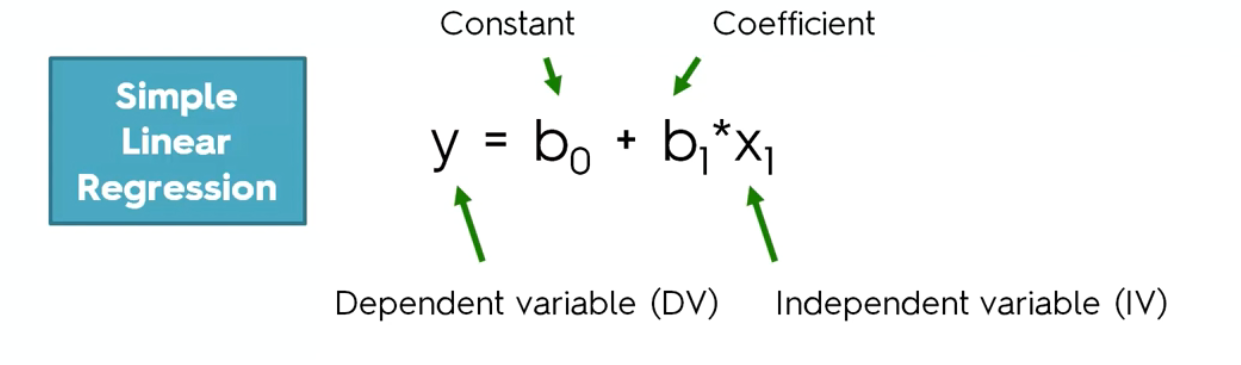

In [106]:
from IPython.display import Image
Image(filename='SimpleLinearRegression.PNG')

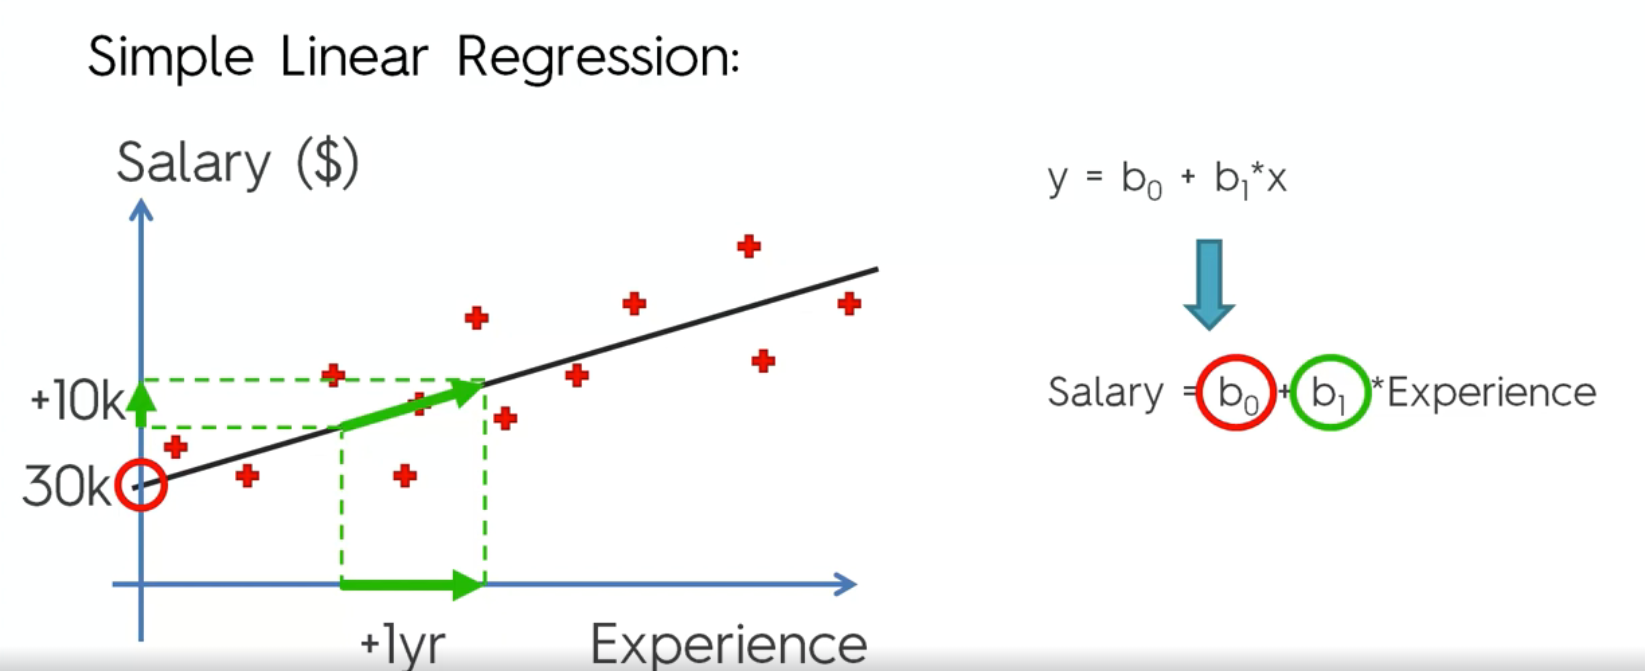

In [107]:
Image(filename='SimpleLinearRegression2.PNG')

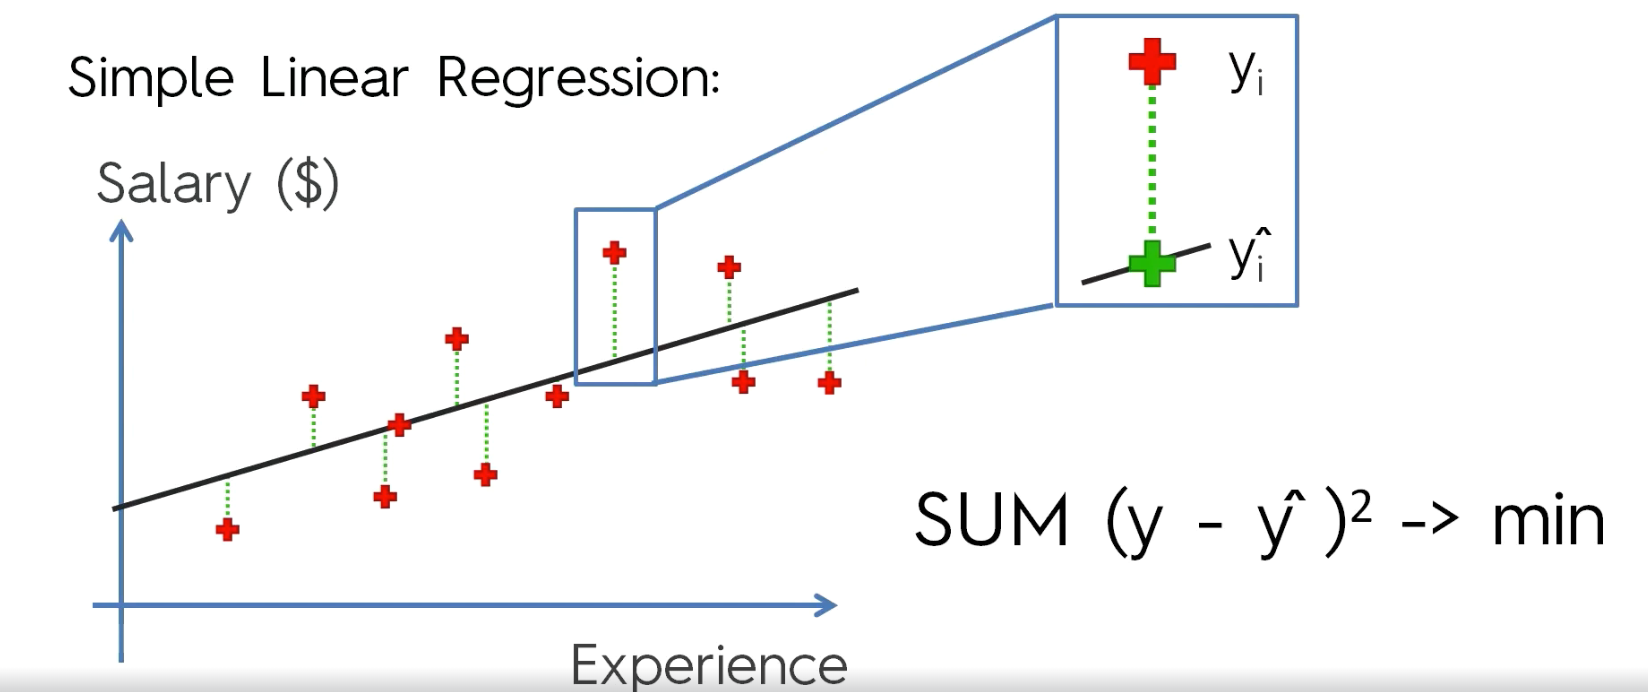

In [108]:
Image(filename='SimpleLinearRegression3.PNG')

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

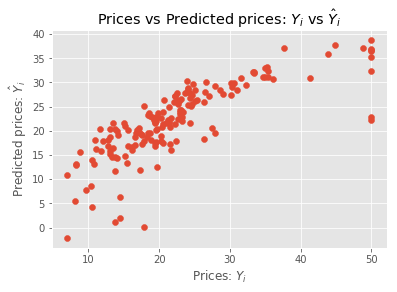

In [109]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Powyższy wykres pokazuje jaka jest relacja miedzy wynikiem predykcji a oryginalnymi danymi. Idelany wykres powinien byc liniowy (45 stopni). 

## Model evaluation

Aby sprawdzić poziom błędu modelu, możemy sprawdzić błąd średniokwadratowy. Jest to jedna z procedur pomiaru średniej kwadratów błędu. Zasadniczo sprawdzamy różnicę między rzeczywistą wartością a przewidywaną wartością. 

In [110]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

34.719491239643084


The above snippet will fit a model based on X_train and Y_train. Now we already got the linear model, we try to predict it to the X_test and now we got the prediction values which stored into Y_pred. To visualize the differences between actual prices and predicted values we also create a scatter plot.

Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line.

# Mean Squared Error

To check the level of error of a model, we can Mean Squared Error. It is one of the procedure to measures the average of the squares of error. Basically, it will check the difference between actual value and the predicted value. For the full theory, you can always search it online. To use it, we can use the mean squared error function of scikit-learn by running this snippet of code.

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y_test, Y_pred)
print(mse)

34.719491239643084


In [112]:
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.336540235231381
R2 score is 0.6432412744361098


The model performance for testing set
--------------------------------------
RMSE is 5.892324773775041
R2 score is 0.6296344935050335


That means that the model isn’t a really great linear model. But, as a start, it is a good way to go. I actually still don’t understand how to know the value of acceptable mean squared error.